In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pix2vertex as p2v

matplotlib.rcParams['figure.figsize'] = (13,7)

In [2]:
detector = p2v.Detector('./weights/shape_predictor_68_face_landmarks.dat')
reconstructor = p2v.Reconstructor('./weights/faces_hybrid_and_rotated_2.pth')

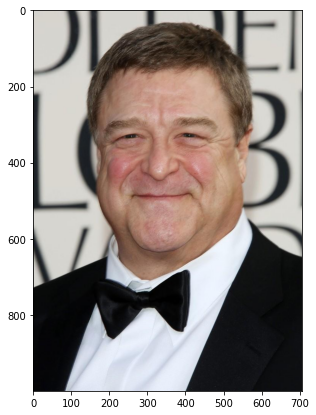

In [10]:
img = cv2.imread('examples/sample.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure()
plt.imshow(img)
plt.show()

Detection 0: Left: 161 Top: 204 Right: 546 Bottom: 590


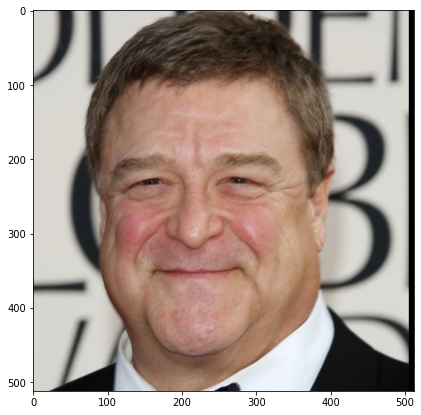

In [11]:
img_crop = detector.detect_and_crop(img)
fig = plt.figure()
plt.imshow(img_crop)
plt.show()

In [12]:
net_res = reconstructor.run_net(img_crop)

torch.Size([1, 3, 512, 512])


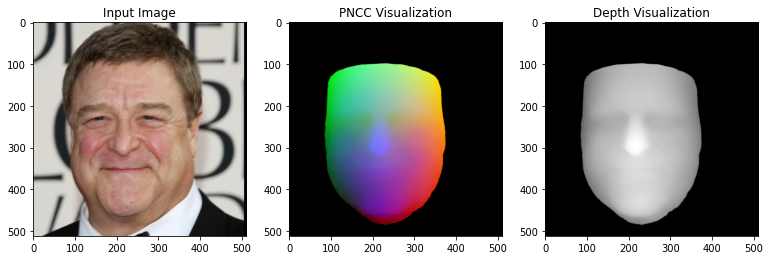

In [13]:
p2v.vis_net_result(img_crop,net_res)

In [14]:
final_res = reconstructor.post_process(net_res)

In [15]:
plot = p2v.vis_depth_interactive(final_res['Z_surface'])

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

Output()

In [16]:
plot = p2v.vis_pcloud_interactive(final_res,img_crop)

ModuleNotFoundError: No module named 'colormap'

In [ ]:
p2v.vis_depth_matplotlib(img_crop,final_res['Z_surface'])